In [89]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
import statsmodels.api as sm  # For statistical modeling (not used in this code but imported)
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.linear_model import LinearRegression  # For linear regression (not used in this code but imported)
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding features
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model

In [90]:
# Load the dataset
# The dataset is assumed to be a CSV file where data is separated by semicolons (';').
table = pd.read_csv("student-por.csv", sep=";")
table

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [91]:
# Split the data into features (X) and target variable (y)
# 'G3' is the target variable (final grade), and it is removed from the features.
x = table.drop(columns=['G1', 'G2', 'G3'])  # Exclude G1, G2, and G3 from features
y = table['G3']  # Target variable (final grade)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_numeric,guardian_numeric,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,1,1,1,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,1,1,0,1,1,1,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,0,0,1,1,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,0,1,0,1,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,0,0,1,1,1,0,1,0,0,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,0,0,1,0,1,1,0,0,0,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,0,0,1,1,1,0,0,0,1,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,0,0,1,1,1,1,1,0,0,1


In [92]:
# Separate categorical and numerical columns
cat_col = x.select_dtypes(include=['object']).columns  # Categorical columns
num_col = x.select_dtypes(include=['int64']).columns  # Numerical columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_numeric,guardian_numeric,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,1,1,0,0,1,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,0,1,1,1,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,2,0,0,1,1,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,3,0,1,0,1,0,0,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,3,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,0,1,1,1,0,1,0,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,1,0,0,0,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
647,17,3,1,2,1,0,2,4,5,3,...,0,0,1,1,1,1,1,0,0,1


In [93]:
# Define transformations for numerical and categorical columns
num_trans = StandardScaler()  # Standardize numerical features (mean=0, std=1)
cat_trans = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_numeric,guardian_numeric,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,1,1,0,0,1,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,0,1,1,1,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,2,0,0,1,1,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,3,0,1,0,1,0,0,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,3,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,0,1,1,1,0,1,0,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,1,0,0,0,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
647,17,3,1,2,1,0,2,4,5,3,...,0,0,1,1,1,1,1,0,0,1


In [94]:
# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_col),  # Apply StandardScaler to numerical columns
        ('cat', cat_trans, cat_col)  # Apply OneHotEncoder to categorical columns
    ]
)


0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [95]:
# Create a machine learning pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # First preprocess the data
    ('model', RandomForestRegressor(random_state=42))  # Then fit a Random Forest Regressor
])


In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [97]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)



In [ ]:
# Extract feature importances from the trained Random Forest model
model = pipeline.named_steps['model']
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()  # Get transformed feature names
feature_importances = model.feature_importances_  # Get importance of each feature


In [ ]:
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Print the feature importances
print("Feature Importances:")
print(importance_df)



In [ ]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))  # Horizontal bar plot
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


***MENTION THAT THE MODEL IS OVER FITTED***


In [99]:
filtered_rows = table[table['activities'] == 'yes']

# Example: Adding the filtered rows to another table
yesTable = pd.DataFrame()  # Create a new empty table
yesTable = pd.concat([yesTable, filtered_rows], ignore_index=True)

# Display the new table
print(yesTable)
yesTable = yesTable.reset_index()



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     GT3       T     4     2    health  services   
1       GP   M   16       U     LE3       T     4     3  services     other   
2       GP   M   15       U     GT3       T     3     4     other     other   
3       GP   F   15       U     GT3       T     2     1  services     other   
4       GP   M   15       U     LE3       T     4     4    health  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
310     MS   M   18       R     GT3       T     2     1     other     other   
311     MS   M   17       U     GT3       T     2     3     other  services   
312     MS   F   18       R     GT3       T     4     4   teacher   at_home   
313     MS   F   19       R     GT3       T     2     3  services     other   
314     MS   F   18       U     GT3       T     1     1     other     other   

     ... reason_numeric guardian_numeric  schoolsup

In [100]:
filtered_rows = table[table['activities'] == 'no']

# Example: Adding the filtered rows to another table
noTable = pd.DataFrame()  # Create a new empty table
noTable = pd.concat([noTable, filtered_rows], ignore_index=True)

# Display the new table
print(noTable)
noTable = noTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   16       U     GT3       T     3     3     other     other   
4       GP   M   16       U     LE3       T     2     2     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
329     MS   F   18       R     GT3       T     2     2   at_home     other   
330     MS   F   17       U     GT3       T     4     3   teacher     other   
331     MS   F   18       U     LE3       T     3     1   teacher  services   
332     MS   M   17       U     LE3       T     3     1  services  services   
333     MS   M   18       R     LE3       T     3     2  services     other   

     ... reason_numeric guardian_numeric  schoolsup

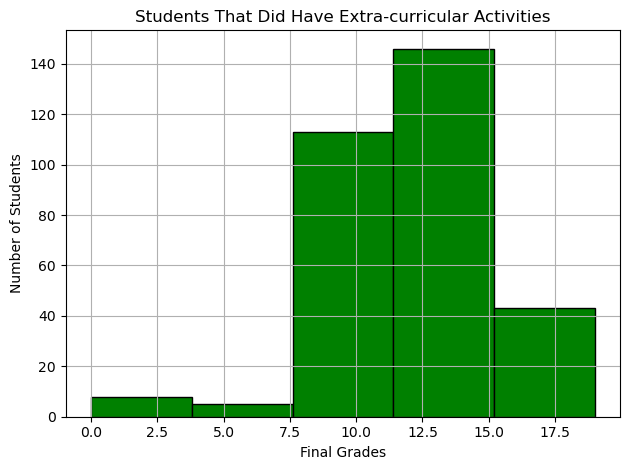

In [101]:
# Create a DataFrame
df = pd.DataFrame(yesTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Did Have Extra-curricular Activities')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()


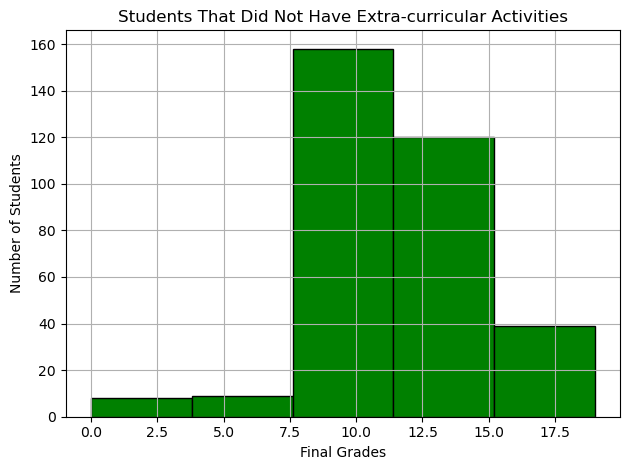

In [102]:
# Create a DataFrame
df = pd.DataFrame(noTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Did Not Have Extra-curricular Activities')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()


In [103]:
filtered_rows = table[table['failures'] == 0]

# Example: Adding the filtered rows to another table
ZeroTable = pd.DataFrame()  # Create a new empty table
ZeroTable = pd.concat([ZeroTable, filtered_rows], ignore_index=True)

# Display the new table
print(ZeroTable)
ZeroTable = ZeroTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
544     MS   F   18       R     GT3       T     4     4   teacher   at_home   
545     MS   F   18       U     LE3       T     3     1   teacher  services   
546     MS   F   18       U     GT3       T     1     1     other     other   
547     MS   M   17       U     LE3       T     3     1  services  services   
548     MS   M   18       R     LE3       T     3     2  services     other   

     ... reason_numeric guardian_numeric  schoolsup

In [104]:
filtered_rows = table[table['failures'] == 1]

# Example: Adding the filtered rows to another table
OneTable = pd.DataFrame()  # Create a new empty table
OneTable = pd.concat([OneTable, filtered_rows], ignore_index=True)

# Display the new table
print(OneTable)
OneTable = OneTable.reset_index()


   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   16       U     LE3       T     2     2     other   at_home   
1      GP   F   16       U     GT3       T     2     2   at_home     other   
2      GP   M   17       R     GT3       T     1     3     other     other   
3      GP   F   16       U     GT3       A     2     2     other     other   
4      GP   F   15       R     GT3       T     1     1     other     other   
..    ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
65     MS   F   17       R     GT3       T     1     1     other  services   
66     MS   F   19       R     GT3       T     1     1   at_home     other   
67     MS   M   19       R     GT3       T     1     1     other  services   
68     MS   M   18       R     GT3       T     4     2     other     other   
69     MS   F   19       R     GT3       T     2     3  services     other   

    ... reason_numeric guardian_numeric  schoolsup_numeric  fam

In [105]:
filtered_rows = table[table['failures'] == 2]

# Example: Adding the filtered rows to another table
TwoTable = pd.DataFrame()  # Create a new empty table
TwoTable = pd.concat([TwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwoTable)
TwoTable = TwoTable.reset_index()


   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   19       U     GT3       T     0     1   at_home     other   
1      GP   M   16       U     LE3       T     1     1  services     other   
2      GP   M   18       U     LE3       T     1     1     other     other   
3      GP   M   16       U     LE3       T     1     2    health  services   
4      GP   M   17       R     GT3       T     3     2     other     other   
5      GP   M   18       U     GT3       T     2     1  services  services   
6      GP   M   20       U     GT3       A     3     2  services     other   
7      GP   F   19       U     LE3       A     1     1     other     other   
8      GP   F   21       U     LE3       T     4     4     other     other   
9      GP   M   21       R     LE3       T     1     1   at_home     other   
10     MS   F   18       R     LE3       A     3     2     other     other   
11     MS   M   19       U     GT3       T     1     1     other

In [106]:
filtered_rows = table[table['failures'] == 3]

# Example: Adding the filtered rows to another table
ThreeTable = pd.DataFrame()  # Create a new empty table
ThreeTable = pd.concat([ThreeTable, filtered_rows], ignore_index=True)

# Display the new table
print(ThreeTable)
ThreeTable = ThreeTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   M   17       U     GT3       T     3     2  services  services   
1      GP   M   17       U     GT3       T     2     1     other     other   
2      GP   F   18       U     GT3       T     2     1  services     other   
3      GP   M   17       R     LE3       T     1     2     other     other   
4      GP   F   18       R     GT3       T     1     1   at_home     other   
5      GP   M   17       U     GT3       T     3     2  services  services   
6      GP   M   18       U     GT3       T     2     2     other     other   
7      GP   M   22       U     GT3       T     3     1  services  services   
8      MS   F   16       R     GT3       T     1     1   at_home     other   
9      MS   M   17       R     GT3       T     4     4    health     other   
10     MS   F   17       R     GT3       T     3     1     other     other   
11     MS   M   19       U     GT3       T     3     2   at_home

In [107]:
filtered_rows = table[table['failures'] == 4]

# Example: Adding the filtered rows to another table
FourTable = pd.DataFrame()  # Create a new empty table
FourTable = pd.concat([FourTable, filtered_rows], ignore_index=True)

# Display the new table
print(FourTable)
FourTable = FourTable.reset_index()

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, school_numeric, gender_numeric, address_numeric, famsize_numeric, Pstatus_numeric, Mjob_numeric, Fjob_numeric, reason_numeric, guardian_numeric, schoolsup_numeric, famsup_numeric, paid_numeric, activities_numeric, nursery_numeric, higher_numeric, internet_numeric, romantic_numeric]
Index: []

[0 rows x 50 columns]


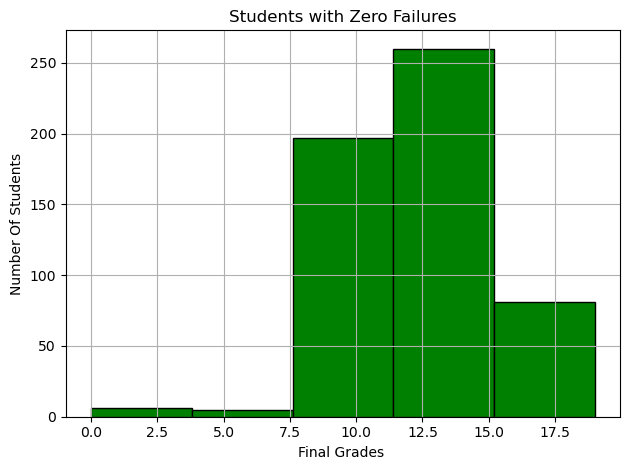

In [108]:
# Create a DataFrame
df = pd.DataFrame(ZeroTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Zero Failures')
plt.xlabel('Final Grades ')
plt.ylabel('Number Of Students')

# Show the plot
plt.tight_layout()
plt.show()

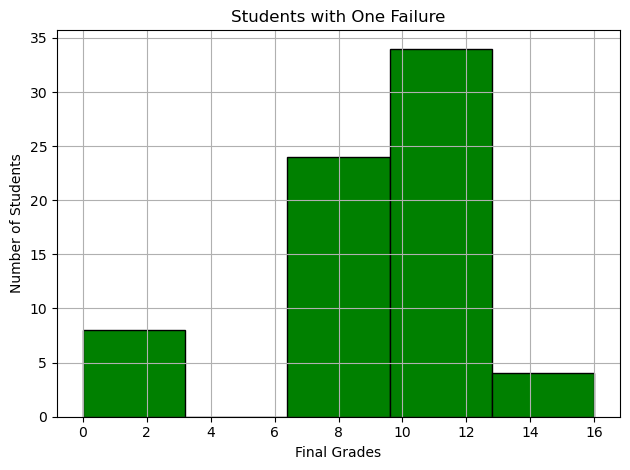

In [109]:
# Create a DataFrame
df = pd.DataFrame(OneTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with One Failure')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

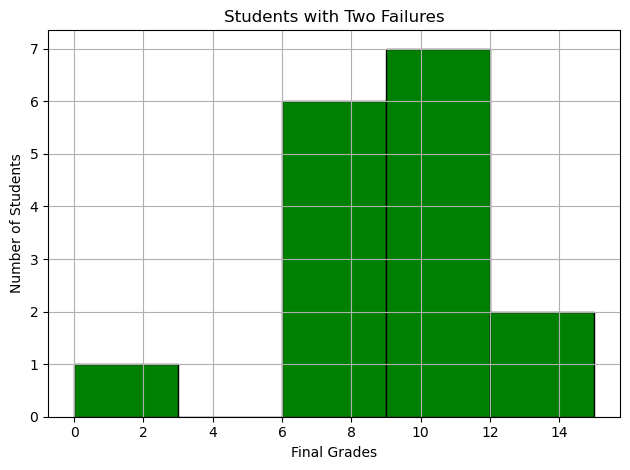

In [110]:
# Create a DataFrame
df = pd.DataFrame(TwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Two Failures')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

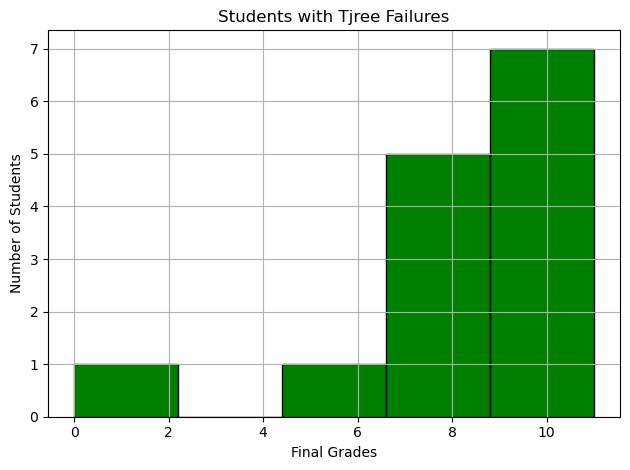

In [111]:
# Create a DataFrame
df = pd.DataFrame(ThreeTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students with Three Failures')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

In [113]:
filtered_rows = table[table['goout'] == 1]

# Example: Adding the filtered rows to another table
OneTable = pd.DataFrame()  # Create a new empty table
OneTable = pd.concat([OneTable, filtered_rows], ignore_index=True)

# Display the new table
print(OneTable)
OneTable = OneTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   M   15       U     GT3       T     3     4     other     other   
1      GP   M   15       U     GT3       T     4     3   teacher     other   
2      GP   M   16       U     LE3       T     4     2   teacher     other   
3      GP   M   15       U     GT3       T     4     4  services  services   
4      GP   F   15       U     GT3       T     2     3     other     other   
5      GP   F   15       R     GT3       T     2     2   at_home     other   
6      GP   M   15       U     GT3       T     2     2  services  services   
7      GP   M   17       U     GT3       T     2     1     other     other   
8      GP   F   16       U     GT3       A     3     4  services     other   
9      GP   M   16       U     GT3       T     2     1   at_home     other   
10     GP   F   15       R     GT3       T     3     3  services  services   
11     GP   F   17       U     GT3       T     4     4     other

In [114]:
filtered_rows = table[table['goout'] == 2]

# Example: Adding the filtered rows to another table
TwoTable = pd.DataFrame()  # Create a new empty table
TwoTable = pd.concat([TwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwoTable)
TwoTable = TwoTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     LE3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     2    health  services   
2       GP   F   16       U     GT3       T     3     3     other     other   
3       GP   M   16       U     LE3       T     4     3  services     other   
4       GP   M   15       U     LE3       A     3     2  services     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
140     MS   M   18       U     LE3       T     4     4   teacher  services   
141     MS   F   18       R     GT3       T     4     4     other   teacher   
142     MS   F   18       R     GT3       T     1     1     other     other   
143     MS   M   19       R     GT3       T     1     1     other  services   
144     MS   F   19       R     GT3       T     2     3  services     other   

     ... reason_numeric guardian_numeric  schoolsup

In [115]:
filtered_rows = table[table['goout'] == 3]

# Example: Adding the filtered rows to another table
ThreeTable = pd.DataFrame()  # Create a new empty table
ThreeTable = pd.concat([ThreeTable, filtered_rows], ignore_index=True)

# Display the new table
print(ThreeTable)
ThreeTable = ThreeTable.reset_index()



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     4   teacher    health   
2       GP   M   15       U     LE3       T     4     4    health  services   
3       GP   M   15       U     GT3       T     4     3   teacher     other   
4       GP   F   16       U     GT3       T     4     4  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
200     MS   M   18       R     GT3       T     2     1     other     other   
201     MS   M   17       U     GT3       T     2     3     other  services   
202     MS   M   18       R     GT3       T     4     2     other     other   
203     MS   F   18       R     GT3       T     2     2   at_home     other   
204     MS   F   18       R     GT3       T     4     4   teacher   at_home   

     ... reason_numeric guardian_numeric  schoolsup

In [116]:
filtered_rows = table[table['goout'] == 4]

# Example: Adding the filtered rows to another table
FourTable = pd.DataFrame()  # Create a new empty table
FourTable = pd.concat([FourTable, filtered_rows], ignore_index=True)

# Display the new table
print(FourTable)
FourTable = FourTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  at_home   teacher   
1       GP   M   16       U     LE3       T     2     2    other     other   
2       GP   F   17       U     GT3       A     4     4    other   teacher   
3       GP   F   16       U     GT3       T     4     4   health     other   
4       GP   M   16       U     LE3       T     2     2    other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
136     MS   F   18       R     LE3       T     4     4    other     other   
137     MS   F   17       R     GT3       T     3     1  at_home     other   
138     MS   M   18       U     GT3       T     4     4  teacher   teacher   
139     MS   F   17       U     GT3       T     4     3  teacher     other   
140     MS   F   18       U     LE3       T     3     1  teacher  services   

     ... reason_numeric guardian_numeric  schoolsup_numeric  fa

In [117]:
filtered_rows = table[table['goout'] == 5]

# Example: Adding the filtered rows to another table
FiveTable = pd.DataFrame()  # Create a new empty table
FiveTable = pd.concat([FiveTable, filtered_rows], ignore_index=True)

# Display the new table
print(FiveTable)
FiveTable = FiveTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   M   17       U     GT3       T     3     2  services  services   
1       GP   M   16       U     GT3       T     4     4   teacher   teacher   
2       GP   F   16       U     LE3       A     3     3     other  services   
3       GP   M   15       U     LE3       A     4     2    health    health   
4       GP   F   16       U     GT3       T     1     1  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
105     MS   F   18       U     LE3       T     2     2  services  services   
106     MS   F   19       U     GT3       T     1     1   at_home  services   
107     MS   M   17       R     GT3       T     4     3  services     other   
108     MS   F   17       R     GT3       T     1     2     other     other   
109     MS   M   17       U     LE3       T     3     1  services  services   

     ... reason_numeric guardian_numeric  schoolsup

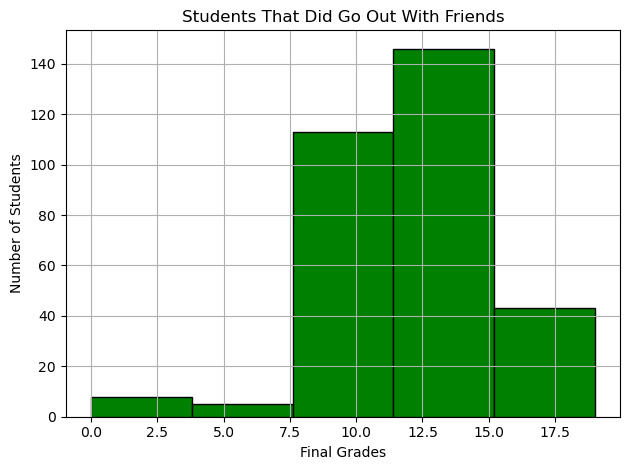

In [118]:
# Create a DataFrame
df = pd.DataFrame(yesTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Did Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

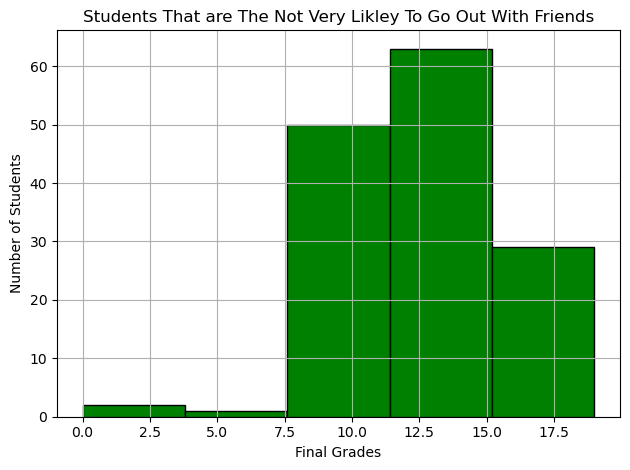

In [119]:
# Create a DataFrame
df = pd.DataFrame(TwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That are The Not Very Likley To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

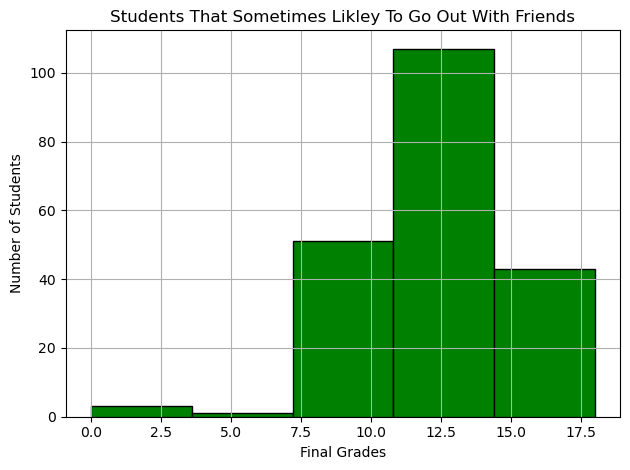

In [120]:
# Create a DataFrame
df = pd.DataFrame(ThreeTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Sometimes Likley To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

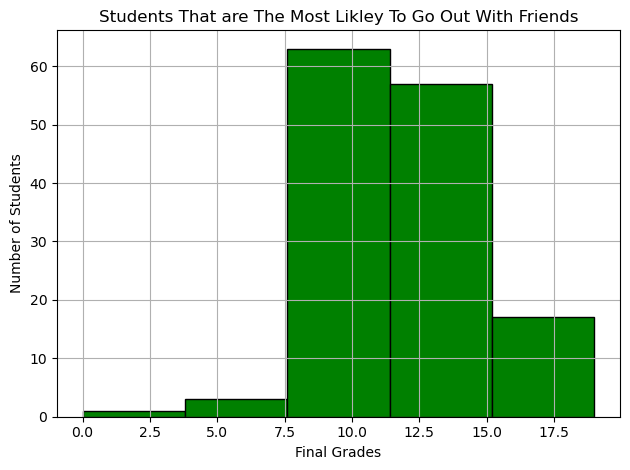

In [121]:
# Create a DataFrame
df = pd.DataFrame(FourTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That are The Most Likley To Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

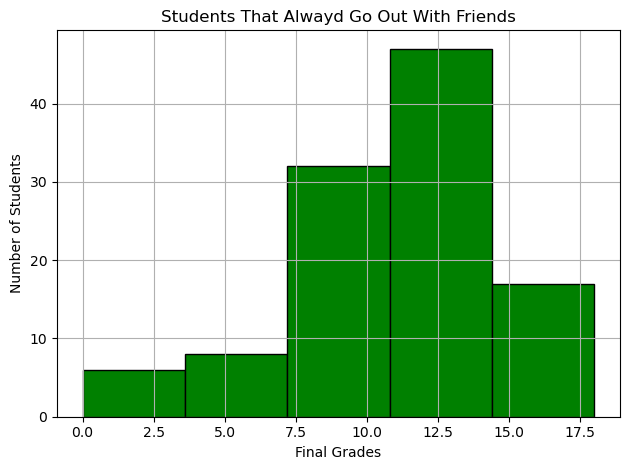

In [122]:
# Create a DataFrame
df = pd.DataFrame(FiveTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Students That Alwayd Go Out With Friends')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Scatter Plot Example'}, xlabel='age', ylabel='G3'>

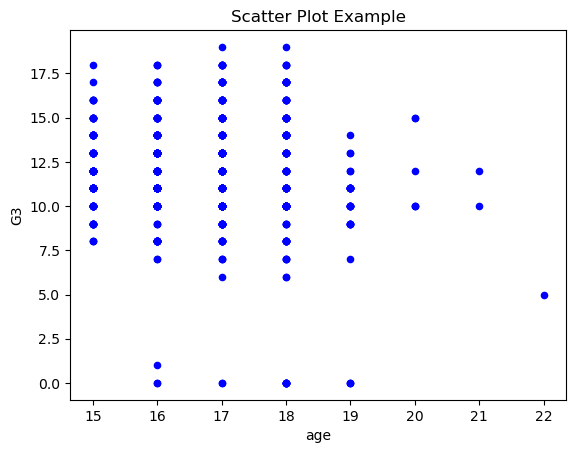

In [123]:
df = pd.DataFrame(table)

# Scatter plot
df.plot(kind='scatter', x='age', y='G3', color='blue', title='Scatter Plot Example')


In [124]:
filtered_rows = table[table['age'] == 15]

# Example: Adding the filtered rows to another table
FifteenTable = pd.DataFrame()  # Create a new empty table
FifteenTable = pd.concat([FifteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(FifteenTable)
FifteenTable = FifteenTable.reset_index()


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   15       U     LE3       T     1     1   at_home     other   
1       GP   F   15       U     GT3       T     4     2    health  services   
2       GP   M   15       U     LE3       A     3     2  services     other   
3       GP   M   15       U     GT3       T     3     4     other     other   
4       GP   F   15       U     GT3       T     4     4   teacher    health   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
107     MS   M   15       U     GT3       T     3     3  services  services   
108     MS   F   15       R     LE3       T     1     1   at_home     other   
109     MS   M   15       R     GT3       T     1     2     other  services   
110     MS   M   15       U     LE3       A     2     2     other     other   
111     MS   M   15       U     LE3       A     2     1  services  services   

     ... reason_numeric guardian_numeric  schoolsup

In [125]:
filtered_rows = table[table['age'] == 16]

# Example: Adding the filtered rows to another table
SixteenTable = pd.DataFrame()  # Create a new empty table
SixteenTable = pd.concat([SixteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(SixteenTable)
SixteenTable = SixteenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   16       U     GT3       T     3     3     other     other   
1       GP   M   16       U     LE3       T     4     3  services     other   
2       GP   M   16       U     LE3       T     2     2     other     other   
3       GP   F   16       U     GT3       T     4     4    health     other   
4       GP   F   16       U     GT3       T     4     4  services  services   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
172     MS   F   16       R     LE3       T     2     2     other  services   
173     MS   M   16       R     GT3       T     3     2  services     other   
174     MS   M   16       R     LE3       T     1     1   at_home     other   
175     MS   M   16       R     GT3       T     2     2  services  services   
176     MS   F   16       U     GT3       A     3     2  services   at_home   

     ... reason_numeric guardian_numeric  schoolsup

In [126]:
filtered_rows = table[table['age'] == 17]

# Example: Adding the filtered rows to another table
SeventeenTable = pd.DataFrame()  # Create a new empty table
SeventeenTable = pd.concat([SeventeenTable, filtered_rows], ignore_index=True)

# Display the new table
print(SeventeenTable)
SeventeenTable = SeventeenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   17       U     GT3       A     4     4     other   teacher   
2       GP   M   17       U     GT3       T     3     2  services  services   
3       GP   M   17       U     GT3       T     2     1     other     other   
4       GP   M   17       R     GT3       T     1     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
174     MS   F   17       R     GT3       T     1     2     other     other   
175     MS   F   17       R     GT3       T     3     1   at_home     other   
176     MS   M   17       U     GT3       T     2     3     other  services   
177     MS   F   17       U     GT3       T     4     3   teacher     other   
178     MS   M   17       U     LE3       T     3     1  services  services   

     ... reason_numeric guardian_numeric  schoolsup

In [127]:
filtered_rows = table[table['age'] == 18]

# Example: Adding the filtered rows to another table
EighteenTable = pd.DataFrame()  # Create a new empty table
EighteenTable = pd.concat([EighteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(EighteenTable)
EighteenTable = EighteenTable.reset_index()

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   18       U     GT3       T     2     1  services     other   
2       GP   M   18       U     LE3       T     3     1  services  services   
3       GP   F   18       U     GT3       A     3     2     other  services   
4       GP   M   18       U     LE3       T     1     1     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
135     MS   F   18       R     GT3       T     2     2   at_home     other   
136     MS   F   18       R     GT3       T     4     4   teacher   at_home   
137     MS   F   18       U     LE3       T     3     1   teacher  services   
138     MS   F   18       U     GT3       T     1     1     other     other   
139     MS   M   18       R     LE3       T     3     2  services     other   

     ... reason_numeric guardian_numeric  schoolsup

In [128]:
filtered_rows = table[table['age'] == 19]

# Example: Adding the filtered rows to another table
NineteenTable = pd.DataFrame()  # Create a new empty table
NineteenTable = pd.concat([NineteenTable, filtered_rows], ignore_index=True)

# Display the new table
print(NineteenTable)
NineteenTable = NineteenTable.reset_index()

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   19       U     GT3       T     0     1   at_home     other   
1      GP   M   19       U     GT3       T     3     2  services   at_home   
2      GP   F   19       U     GT3       T     3     3     other     other   
3      GP   F   19       U     GT3       T     2     2  services  services   
4      GP   M   19       U     LE3       A     4     3  services   at_home   
5      GP   F   19       U     GT3       T     3     3     other  services   
6      GP   F   19       R     GT3       T     3     2  services  services   
7      GP   F   19       U     GT3       T     4     4    health     other   
8      GP   M   19       R     LE3       T     2     1   at_home  services   
9      GP   M   19       R     GT3       T     3     3     other  services   
10     GP   M   19       U     GT3       T     4     2    health     other   
11     GP   F   19       U     GT3       T     1     1     other

In [129]:
filtered_rows = table[table['age'] == 20]

# Example: Adding the filtered rows to another table
TwentyTable = pd.DataFrame()  # Create a new empty table
TwentyTable = pd.concat([TwentyTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentyTable)
TwentyTable = TwentyTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   20       R     GT3       T     2     1     other     other   
1     GP   M   20       U     GT3       A     3     2  services     other   
2     GP   F   20       R     GT3       T     1     1     other     other   
3     GP   F   20       U     GT3       T     1     0     other     other   
4     MS   F   20       U     GT3       T     3     3   at_home  services   
5     MS   M   20       R     GT3       T     1     1     other     other   

   ... reason_numeric guardian_numeric  schoolsup_numeric  famsup_numeric  \
0  ...              0                2                  1               0   
1  ...              0                2                  1               1   
2  ...              1                2                  1               1   
3  ...              1                0                  0               1   
4  ...              2                0                  1               1  

In [130]:
filtered_rows = table[table['age'] == 21]

# Example: Adding the filtered rows to another table
TwentyoneTable = pd.DataFrame()  # Create a new empty table
TwentyoneTable = pd.concat([TwentyoneTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentyoneTable)
TwentyoneTable = TwentyoneTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob   Fjob  ...  \
0     GP   F   21       U     LE3       T     4     4    other  other  ...   
1     GP   M   21       R     LE3       T     1     1  at_home  other  ...   

  reason_numeric guardian_numeric  schoolsup_numeric  famsup_numeric  \
0              1                2                  1               1   
1              0                2                  1               0   

   paid_numeric activities_numeric nursery_numeric higher_numeric  \
0             0                  0               0              0   
1             1                  0               0              1   

  internet_numeric romantic_numeric  
0                0                1  
1                0                0  

[2 rows x 50 columns]


In [131]:
filtered_rows = table[table['age'] == 22]

# Example: Adding the filtered rows to another table
TwentytwoTable = pd.DataFrame()  # Create a new empty table
TwentytwoTable = pd.concat([TwentytwoTable, filtered_rows], ignore_index=True)

# Display the new table
print(TwentytwoTable)
TwentytwoTable = TwentytwoTable.reset_index()

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   M   22       U     GT3       T     3     1  services  services   

   ... reason_numeric guardian_numeric  schoolsup_numeric  famsup_numeric  \
0  ...              2                0                  1               1   

   paid_numeric activities_numeric nursery_numeric higher_numeric  \
0             1                  1               1              1   

  internet_numeric romantic_numeric  
0                0                0  

[1 rows x 50 columns]


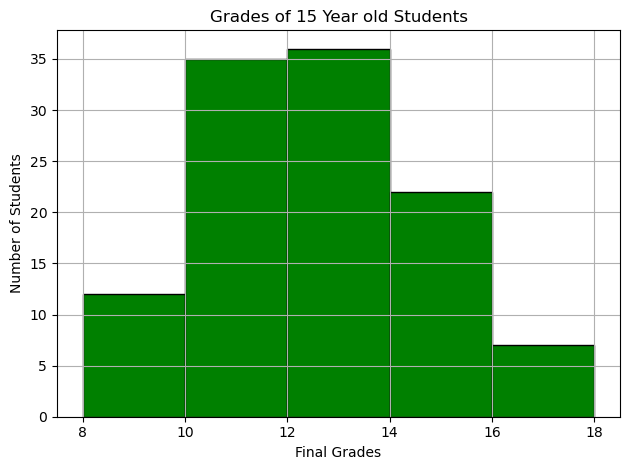

In [132]:
# Create a DataFrame
df = pd.DataFrame(FifteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 15 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


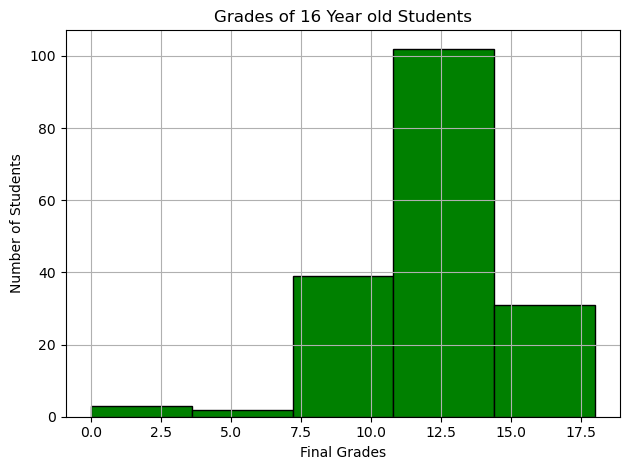

In [133]:
plt.show()
# Create a DataFrame
df = pd.DataFrame(SixteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 16 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


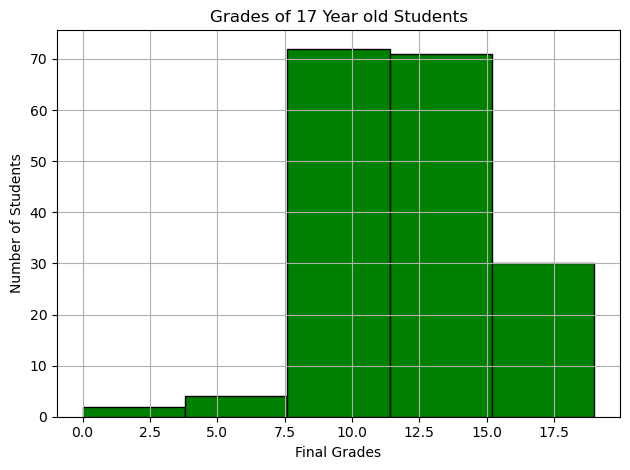

In [134]:
plt.show()# Create a DataFrame
df = pd.DataFrame(SeventeenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 17 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


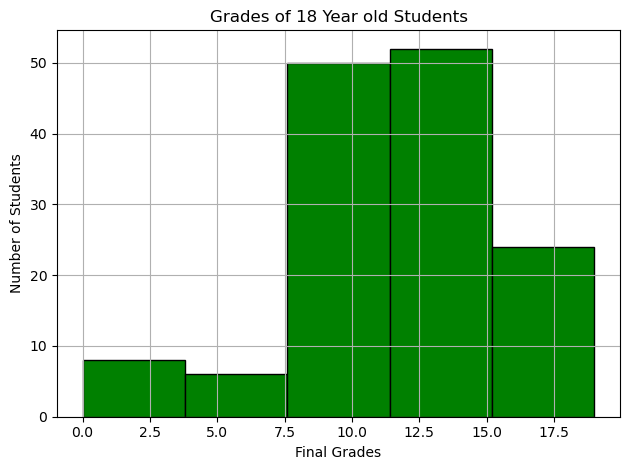

In [135]:
plt.show()# Create a DataFrame
df = pd.DataFrame(EighteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 18 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


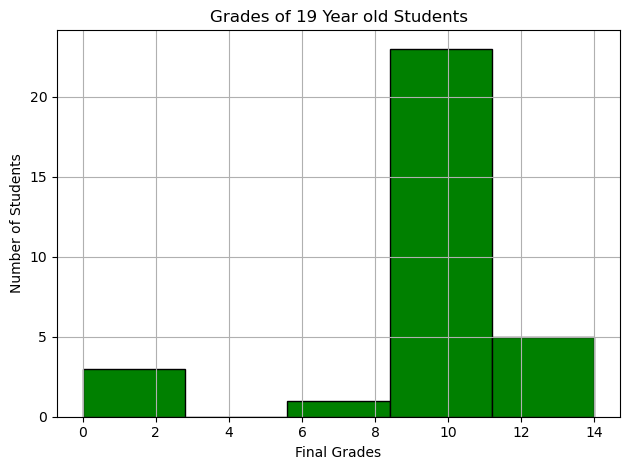

In [136]:
plt.show()# Create a DataFrame
df = pd.DataFrame(NineteenTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 19 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


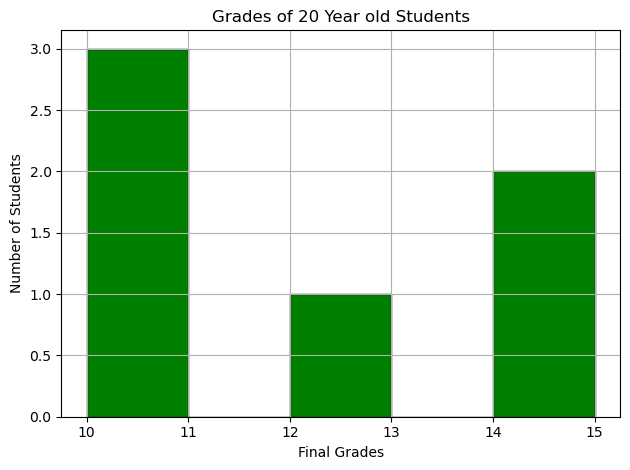

In [137]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentyTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 20 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


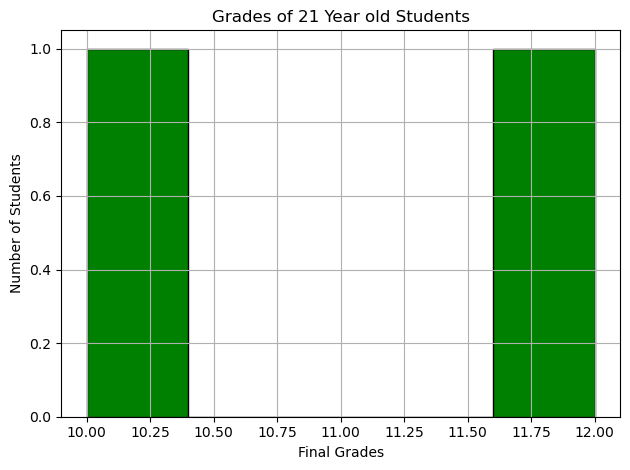

In [138]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentyoneTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 21 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


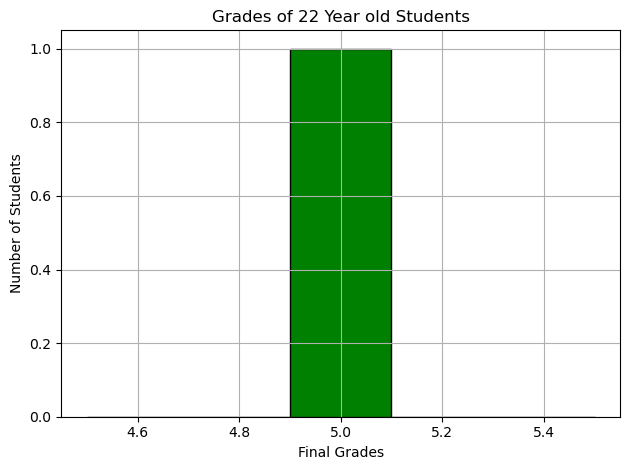

In [139]:
plt.show()# Create a DataFrame
df = pd.DataFrame(TwentytwoTable)

df['G3'].hist(bins=5, color='green', edgecolor='black')

# Add titles and labels
plt.title('Grades of 22 Year old Students')
plt.xlabel('Final Grades')
plt.ylabel('Number of Students')

# Show the plot
plt.tight_layout()


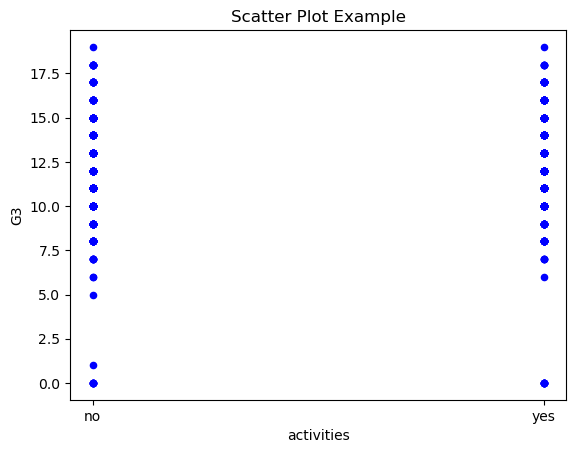

In [140]:
# Create a DataFrame
df = pd.DataFrame(table)

# Scatter plot using Pandas
df.plot(kind='scatter', x='activities', y='G3', color='blue', title='Scatter Plot Example')

# Display the plot
plt.show()  # Use plt.show() to render the plot
